In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [3]:
# Reading Dataset
df = pd.read_csv('train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# VARIABLE DESCRIPTIONS:
# Variable              Description
# Loan_ID               Unique Loan ID
# Gender                Male/ Female
# Married               Applicant married (Y/N)
# Dependents            Number of dependents
# Education             Applicant Education (Graduate/ Under Graduate)
# Self_Employed         Self employed (Y/N)
# ApplicantIncome       Applicant income
# CoapplicantIncome     Coapplicant income
# LoanAmount            Loan amount in thousands
# Loan_Amount_Term      Term of loan in months
# Credit_History        credit history meets guidelines
# Property_Area         Urban/ Semi Urban/ Rural
# Loan_Status           Loan approved (Y/N)

In [4]:
# Summary of numerical fields by using describe() function
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.shape

(614, 13)

In [6]:
# Here are a few inferences:
# 1. LoanAmount has (614 – 592) 22 missing values.
# 2. Loan_Amount_Term has (614 – 600) 14 missing values.
# 3. Credit_History has (614 – 564) 50 missing values.
# 4. We can also look that about 84% applicants have a credit_history. 
#    How? Because the mean of Credit_History field is 0.84 and Credit_History has value 
#    1 for those who have a credit history and 0 otherwise)
# 5. The ApplicantIncome distribution seems to be in line with expectation. 
#    Same with CoapplicantIncome

In [12]:
# Check other non-numerical columns whether have null or nan values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

DISTRIBUTION ANALYSIS

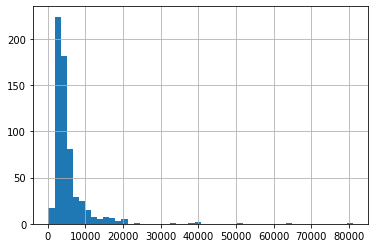

In [13]:
df['ApplicantIncome'].hist(bins=50)
# Here we observe that there are few extreme values. 
# This is also the reason why 50 bins are required to depict the distribution clearly.

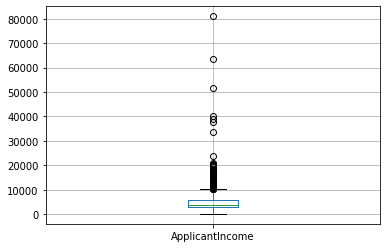

In [14]:
# Next, we look at box plots to understand the distributions. 
# Box plot can be plotted by:
df.boxplot(column='ApplicantIncome')

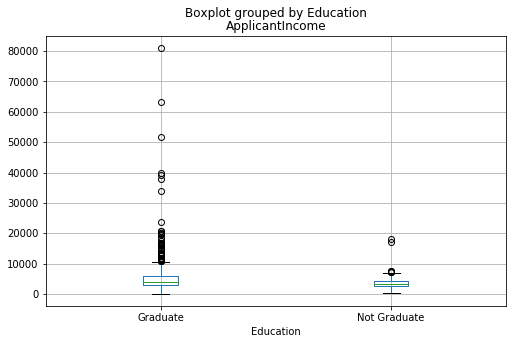

In [33]:
# This confirms the presence of a lot of outliers/extreme values. This can be attributed to 
# the income disparity in the society. Part of this can be driven by the fact that we are 
# looking at people with different education levels. I will segregate them by Education:
df.boxplot(column='ApplicantIncome', by = 'Education',figsize=(8,5))

In [16]:
# We can see that there is no substantial different between the mean income of graduate 
# and non-graduates. But there are a higher number of graduates with very high incomes, 
# which are appearing to be the outliers.

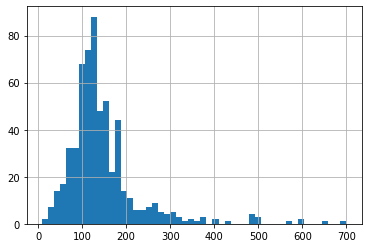

In [17]:
# Let’s look at the histogram and boxplot of LoanAmount using the following command:
df['LoanAmount'].hist(bins=50)

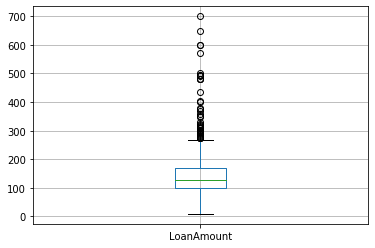

In [18]:
df.boxplot(column='LoanAmount')

In [19]:
# Again, there are some extreme values. Clearly, both ApplicantIncome and LoanAmount require 
# some amount of data munging. LoanAmount has missing and well as extreme values values, 
# while ApplicantIncome has a few extreme values, which demand deeper understanding.

In [7]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],
               aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Credit History:') 
print (temp1)
print ('\nProbility of getting loan for each Credit History class:')
print (temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


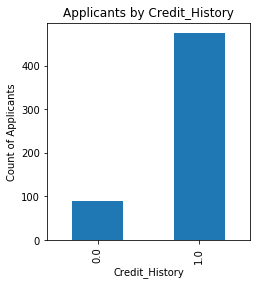

In [21]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

Text(0.5, 1.0, 'Probability of getting loan by credit history')

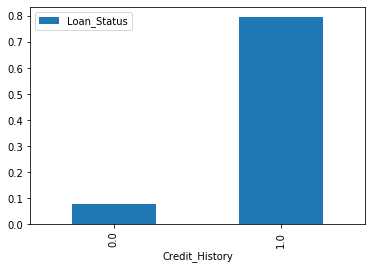

In [22]:
ax2 = fig.add_subplot(1,2,2)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

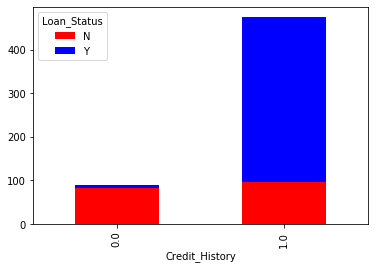

In [25]:
# This shows that the chances of getting a loan are eight-fold if the applicant has a valid 
# credit history. You can plot similar graphs by Married, Self-Employed, Property_Area, etc.
# Alternately, these two plots can also be visualized by combining them in a stacked chart:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

DATA MUNGING

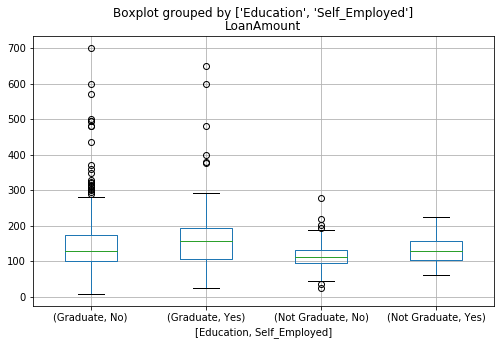

In [32]:
df.boxplot(column='LoanAmount', by = ['Education','Self_Employed'],figsize=(8,5))

In [35]:
# We see some variations in the median of loan amount for each group and this can be used 
# to impute the values. But first, we have to ensure that each of Self_Employed and Education 
# variables should not have a missing values.
# As we say earlier, Self_Employed has some missing values. Let’s look at the frequency table:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [36]:
# Since ~86% values are “No”, it is safe to impute the missing values as “No” as there is a 
# high probability of success. This can be done using the following code:
df['Self_Employed'].fillna('No',inplace=True)

In [45]:
# Now, we will create a Pivot table, which provides us median values for all the groups of 
# unique values of Self_Employed and Education features. Next, we define a function, which 
# returns the values of these cells and apply it to fill the missing values of loan amount:
table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', 
                       aggfunc=np.median)
# Define function to return value of this pivot_table
def fage(x):
    return table.loc[x['Self_Employed'],x['Education']]
# Replace missing values
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

BUILDING PREDICTIVE MODEL

In [49]:
# After we have made the data useful for modeling, we create a predictive model 
# on our data set.
# Before that we will fill all the missing values in the dataset. This can be done 
# using the following code:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [53]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area',
           'Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [69]:
# We will import the required modules. Then we will define a generic classification function, 
# which takes a model as input and determines the Accuracy and Cross-Validation scores
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
    #Fit the model:
    model.fit(data[predictors],data[outcome])
    #Make predictions on training set:
    predictions = model.predict(data[predictors])
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))
    #Perform k-fold cross-validation with 5 folds
    kf = KFold(n_splits=5)
    error = []
    for train, test in kf.split(data):
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]
        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
        #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome])

LOGISTIC REGRESSION

In [75]:
# The chances of getting a loan will be higher for:
# 1. Applicants having a credit history
# 2. Applicants with higher applicant and co-applicant incomes
# 3. Applicants with higher education level
# 4. Properties in urban areas with high growth perspectives
# let’s make our first model with ‘Credit_History’
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


DECISION TREE

In [76]:
# Decision tree is another method for making a predictive model
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%
